 # Code for analyzing ephys and transcriptomic data for the Psilocybin Project
 
 ## Just playing around, can ignore anything below here

In [2]:
#imports

import pandas as pd    
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap
import numpy as np

In [3]:
#csv containing all calulated ephys features from human and mouse experiments
data = pd.read_csv("Psilocybin_ephys_features_washin.csv")

In [4]:
#calculating AP_threshold feature
data["AP_thres"] = data["AP_peak"] - data["AP_amp"]
data

,name,species,treatment,after_treatment,common_potential,cell_type,notes,AP_peak,AP_amp,max_dvdt,...,FI_600,FI_650,FI_700,FI_750,FI_800,FI_850,FI_900,Layer,topLeaf_label,AP_thres
0,Slc17a6-IRES-Cre;Ai14-564186.11.09.01,mouse,stability,0.0,NaN,pyramidal,NaN,41.198730,77.118279,294.18945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-35.919549
1,Slc17a6-IRES-Cre;Ai14-564186.11.09.01,mouse,stability,1.0,NaN,pyramidal,NaN,26.489258,64.440643,204.46777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-37.951385
2,Slc17a6-IRES-Cre;Ai14-564186.07.09.01,mouse,stability,0.0,NaN,pyramidal,NaN,46.783447,85.059761,388.79395,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-38.276314
3,Slc17a6-IRES-Cre;Ai14-564186.07.09.01,mouse,stability,1.0,NaN,pyramidal,NaN,39.947510,86.917267,400.08545,...,33.0,34.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,-46.969757
4,Slc17a6-IRES-Cre;Ai14-563068.10.10.01,mouse,stability,0.0,NaN,pyramidal,NaN,50.048828,100.650460,390.01465,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-50.601632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Stability Experiments

In [5]:
#filter out stability experiments from full dataframe
stability = data[(data['treatment'] == "stability") | (data['treatment'] == "control")]
stability.columns

Index(['name', 'species', 'treatment', 'after_treatment', 'common_potential',
       'cell_type', 'notes', 'AP_peak', 'AP_amp', 'max_dvdt', 'min_dvdt',
       'halfwidth', 'resonance_freq', 'cutoff', 'input_R', 'sag', 'RMP',
       'EPSC_5sec', 'EPSC_Hz', 'EPSC_amp', 'washin_change', 'washin_outcome',
       'FI_50', 'FI_100', 'FI_150', 'FI_200', 'FI_250', 'FI_300', 'FI_350',
       'FI_400', 'FI_450', 'FI_500', 'FI_550', 'FI_600', 'FI_650', 'FI_700',
       'FI_750', 'FI_800', 'FI_850', 'FI_900', 'Layer', 'topLeaf_label',
       'AP_thres'],
      dtype='object')

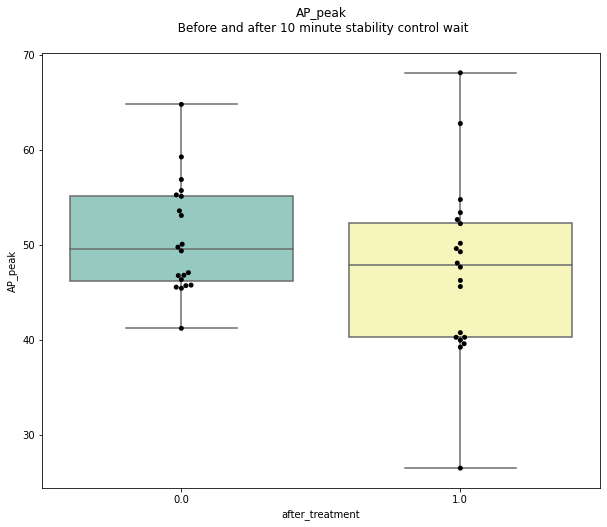

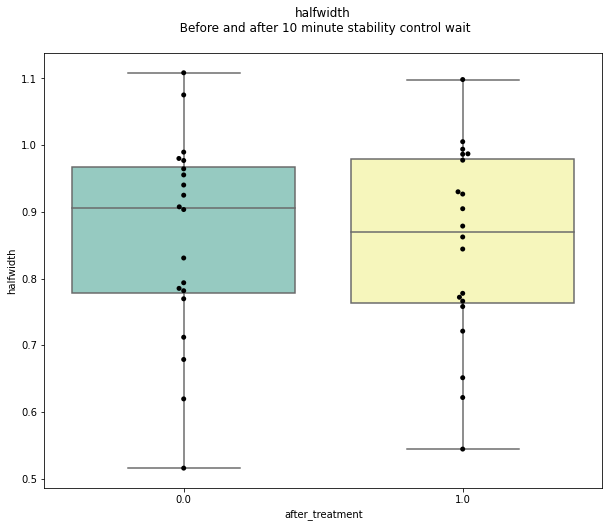

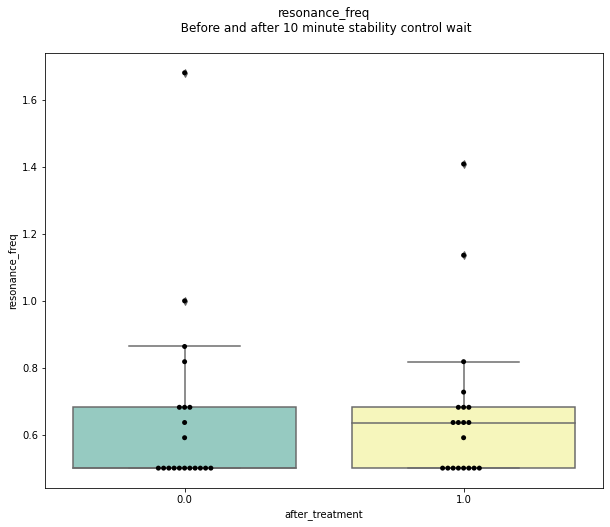

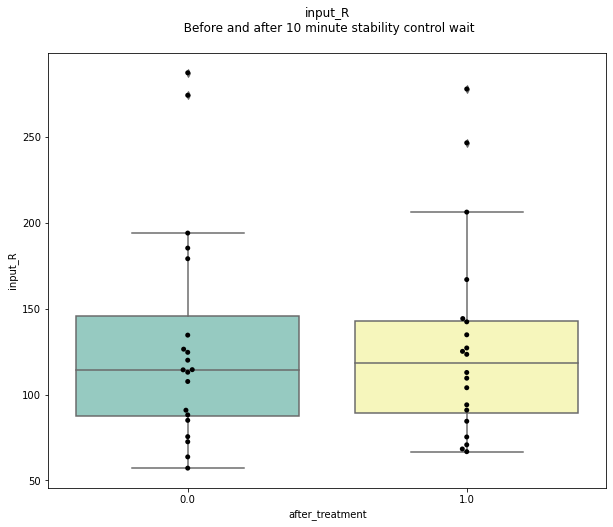

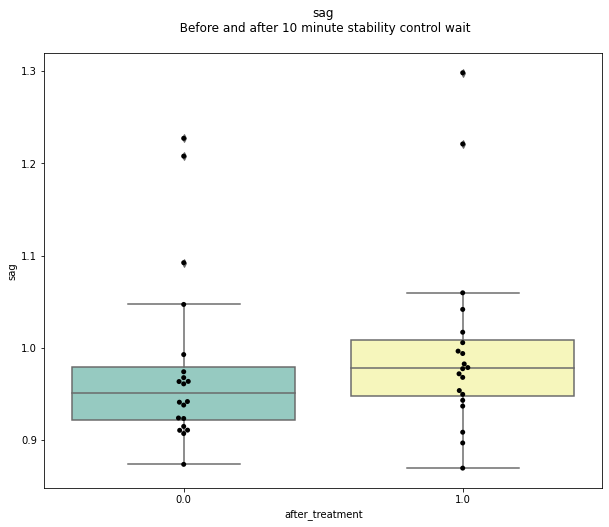

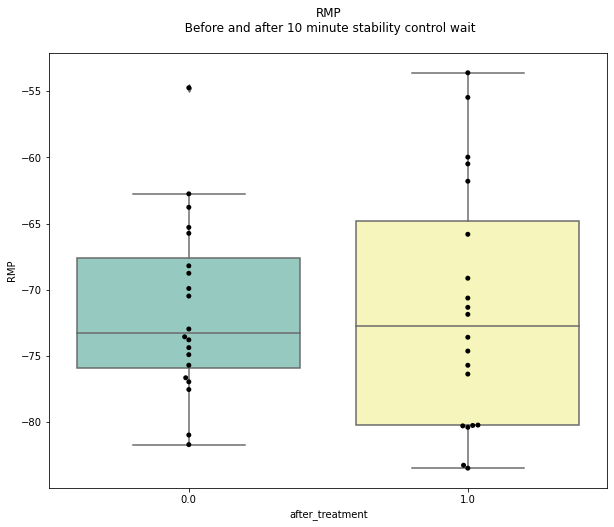

In [6]:
#boxplots before and after washin
for i in ['AP_peak','halfwidth', 'resonance_freq', 'input_R', 'sag', 'RMP']:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x="after_treatment", y=i, data= stability, palette="Set3")
    sns.swarmplot(x="after_treatment", y=i, data= stability, color = 'black')
    plt.title('{}\n  Before and after 10 minute stability control wait \n'.format(i))

# Serotonin Experiments

In [10]:
#filter out serotonin experiments from full dataframe
serotonin = data[(data['treatment'] == "50uM 5-HT") & (data['common_potential'] != 1) ]
serotonin

,name,species,treatment,after_treatment,common_potential,cell_type,notes,AP_peak,AP_amp,max_dvdt,...,FI_600,FI_650,FI_700,FI_750,FI_800,FI_850,FI_900,Layer,topLeaf_label,AP_thres
18,H21.03.302.11.04.01,human,50uM 5-HT,0.0,NaN,pyramidal,NaN,46.508789,83.809402,244.44580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exc L4-6 RORB SEMA3E,-37.300613
19,H21.03.302.11.04.01,human,50uM 5-HT,1.0,NaN,pyramidal,NaN,42.449951,82.281425,235.29053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exc L4-6 RORB SEMA3E,-39.831474
24,Slc17a7-IRES2-Cre;Ai14-565033.11.10.01,mouse,50uM 5-HT,0.0,NaN,pyramidal,NaN,43.792725,77.787842,289.91699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-33.995117
25,Slc17a7-IRES2-Cre;Ai14-565033.11.10.01,mouse,50uM 5-HT,1.0,NaN,pyramidal,NaN,44.433594,79.989258,339.96582,...,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-35.555664
26,Vip-IRES-Cre;Ai14-564742.11.10.01,mouse,50uM 5-HT,0.0,NaN,pyramidal,NaN,50.140381,86.741447,403.74756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-36.601066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,H21.03.309.11.05.02.01,human,50uM 5-HT,1.0,0.0,pyramidal,NaN,63.415527,99.778160,335.99854,...,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-36.362633
86,Q21.26.009.11.03,NHP,50uM 5-HT,0.0,0.0,pyramidal,NaN,62.927246,95.120224,357.97119,...,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-32.192978
87,Q21.26.009.11.03,NHP,50uM 5-HT,1.0,0.0,pyramidal,NaN,62.683105,92.722176,327.75879,...,15.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.039071
88,Q21.26.009.11.13,NHP,50uM 5-HT,0.0,0.0,pyramidal,NaN,51.147461,85.316597,263.97705,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.169136


### Human serotonin experiments only

In [12]:
serotonin_H = data[(data['treatment'] == "50uM 5-HT") & (data['species'] == "human") & (data['common_potential'] != 1)]
serotonin_H

,name,species,treatment,after_treatment,common_potential,cell_type,notes,AP_peak,AP_amp,max_dvdt,...,FI_600,FI_650,FI_700,FI_750,FI_800,FI_850,FI_900,Layer,topLeaf_label,AP_thres
18,H21.03.302.11.04.01,human,50uM 5-HT,0.0,NaN,pyramidal,NaN,46.508789,83.809402,244.44580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exc L4-6 RORB SEMA3E,-37.300613
19,H21.03.302.11.04.01,human,50uM 5-HT,1.0,NaN,pyramidal,NaN,42.449951,82.281425,235.29053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exc L4-6 RORB SEMA3E,-39.831474
28,H21.03.304.11.05.01.01,human,50uM 5-HT,0.0,NaN,pyramidal,NaN,54.931641,92.600197,269.77539,...,28.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-37.668556
29,H21.03.304.11.05.01.01,human,50uM 5-HT,1.0,NaN,pyramidal,NaN,47.882080,88.057129,236.51123,...,30.0,33.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,-40.175049
30,H21.03.304.11.05.02.01,human,50uM 5-HT,0.0,NaN,pyramidal,NaN,65.917969,89.698044,273.13232,...,27.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-23.780075
31,H21.03.304.11.05.02.01,human,50uM 5-HT,1.0,NaN,pyramidal,NaN,64.208984,85.812714,249.63379,...,27.0,29.0,31.0,32.0,NaN,NaN,NaN,NaN,NaN,-21.603730
32,H21.03.304.11.06.01.01,human,50uM 5-HT,0.0,NaN,pyramidal,NaN,55.877686,90.550064,288.08594,...,21.0,23.0,25.0,24.0,NaN,NaN,NaN,NaN,NaN,-34.672378
33,H21.03.304.11.06.01.01,human,50uM 5-HT,1.0,NaN,pyramidal,NaN,47.546387,88.796288,274.04785,...,19.0,23.0,23.0,23.0,NaN,NaN,NaN,NaN,NaN,-41.249901
46,H21.06.351.11.04.01.01,human,50uM 5-HT,0.0,NaN,pyramidal,NaN,54.534912,87.150024,239.86816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-32.615112
47,H21.06.351.11.04.01.01,human,50uM 5-HT,1.0,NaN,pyramidal,NaN,52.124023,88.053764,248.41309,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-35.929741


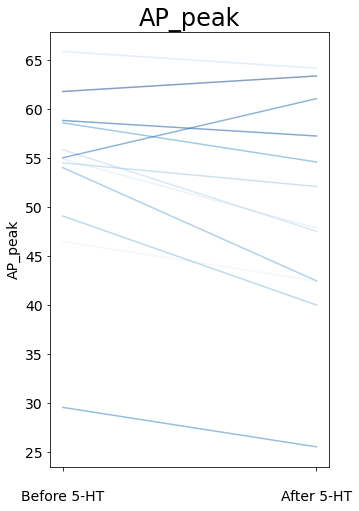

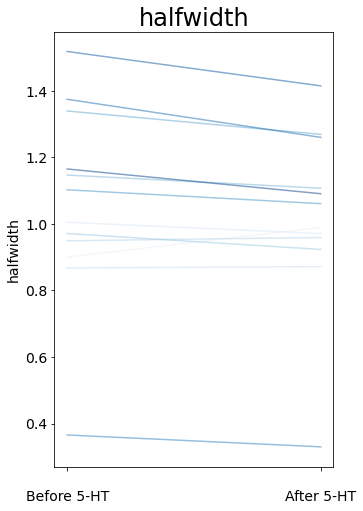

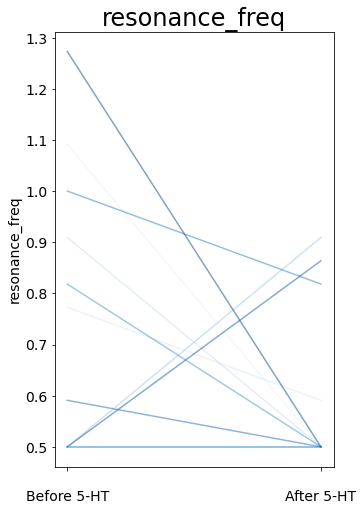

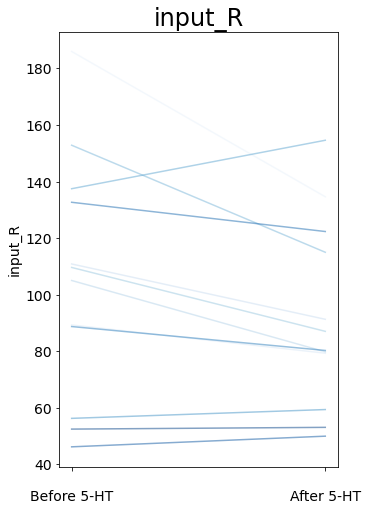

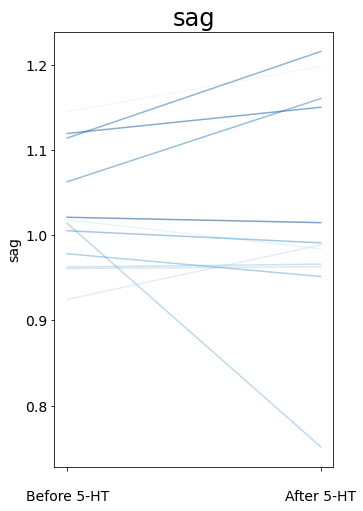

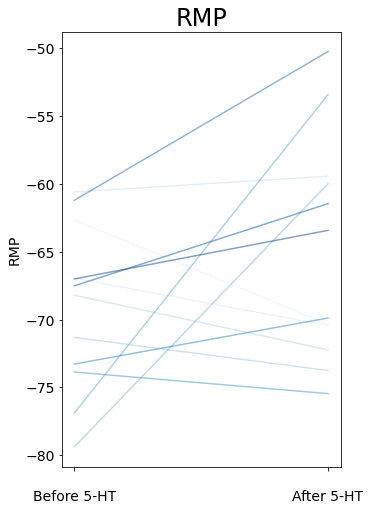

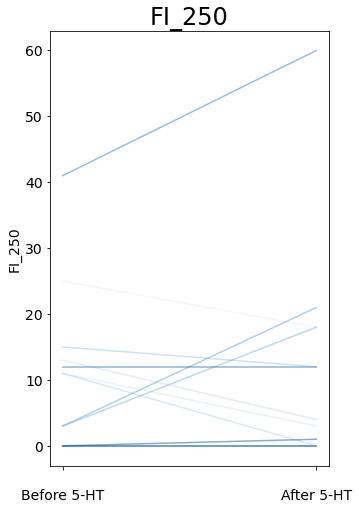

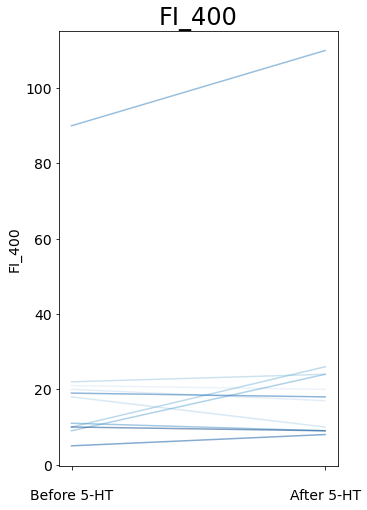

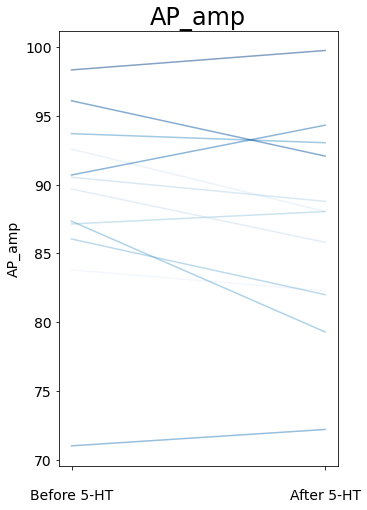

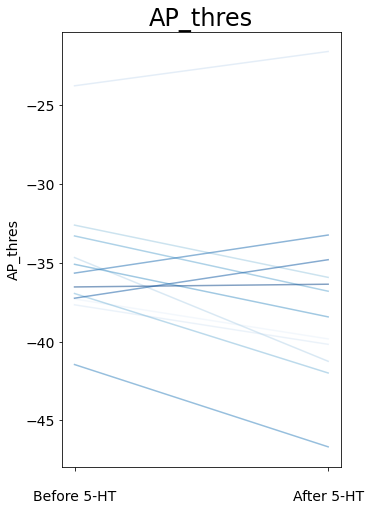

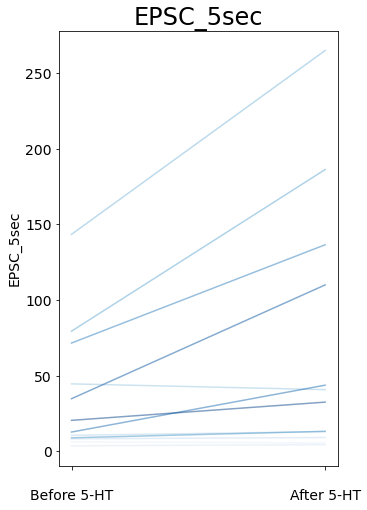

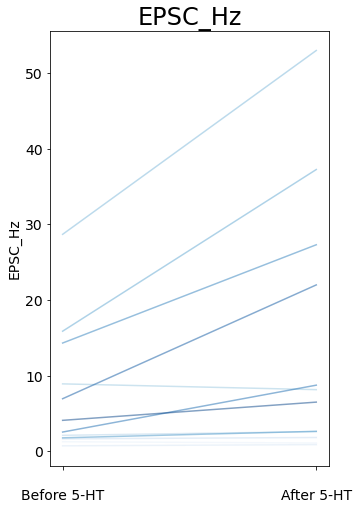

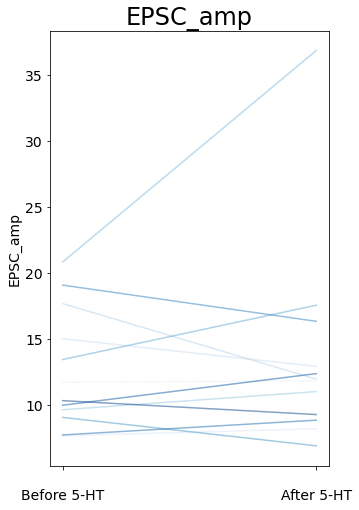

In [15]:
agg_H = serotonin_H.groupby(by='after_treatment').mean()

for i in ['AP_peak','halfwidth', 'resonance_freq', 'input_R', 'sag', 'RMP','FI_250','FI_400', 'AP_amp', 'AP_thres', 'EPSC_5sec', 'EPSC_Hz', 'EPSC_amp']:
    plt.figure(figsize=(5, 8))
    sns.lineplot(
        data=serotonin_H,
        x="after_treatment", y=i, hue="name",
        markers=True, legend=False, palette="Blues", alpha= 0.5)
    plt.xticks( [0,1], labels=["\nBefore 5-HT", "\nAfter 5-HT"], fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('')
    plt.ylabel(i,fontsize=14)
    plt.title('{}'.format(i), fontsize=24)

### macaque serotonin experiments only

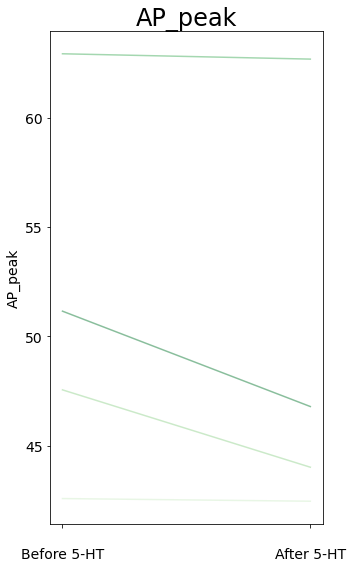

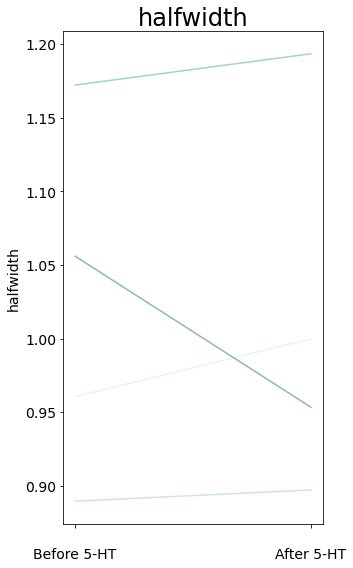

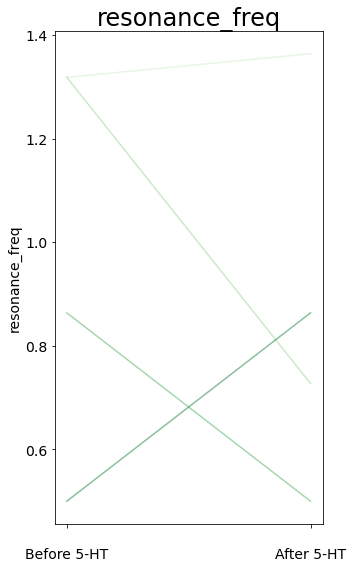

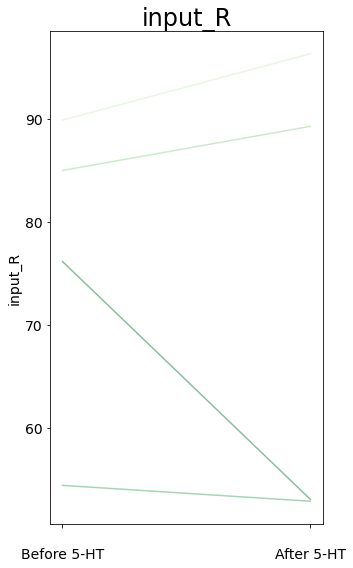

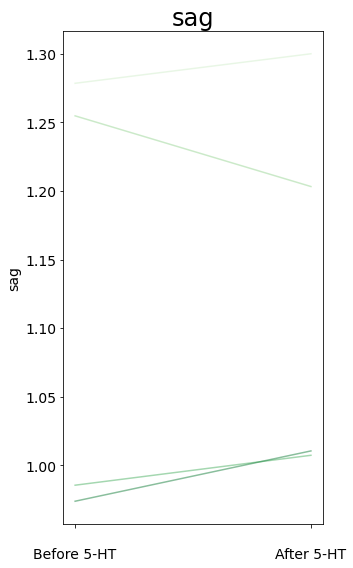

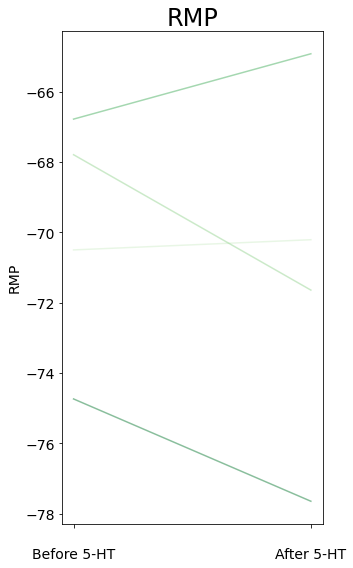

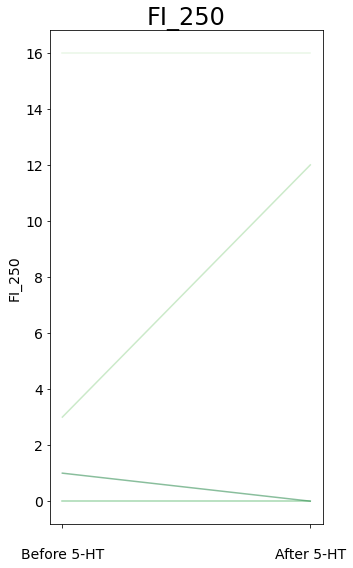

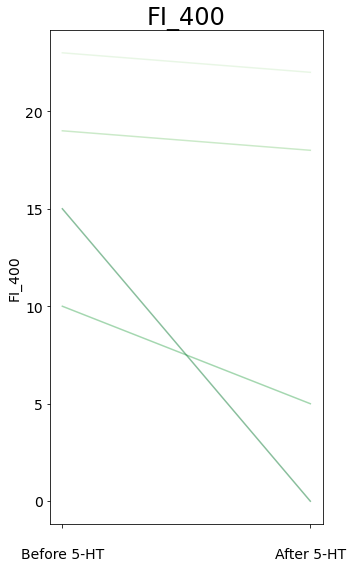

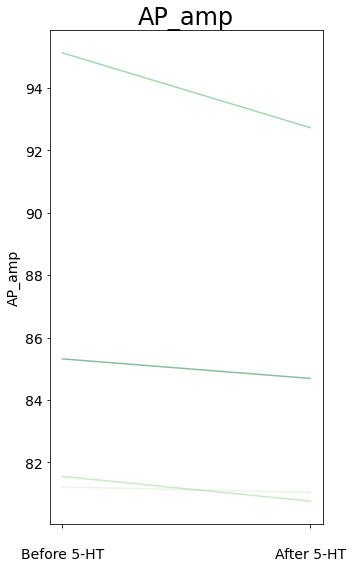

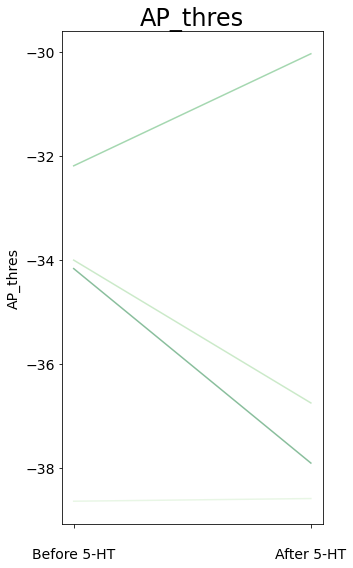

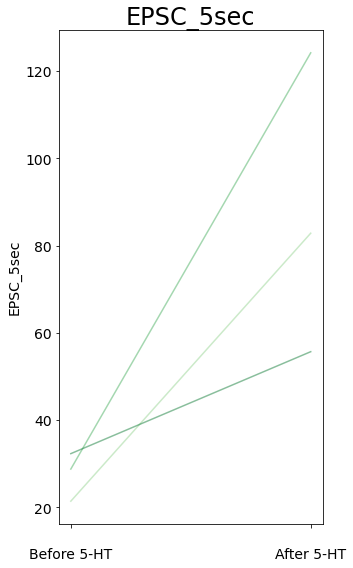

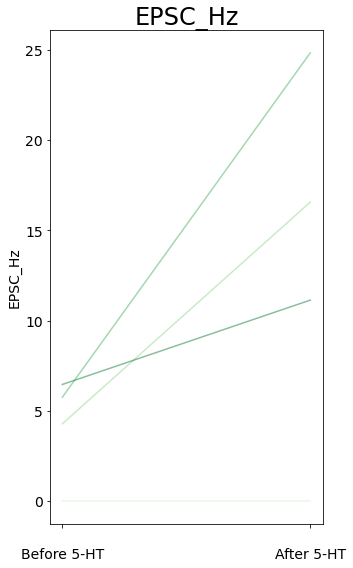

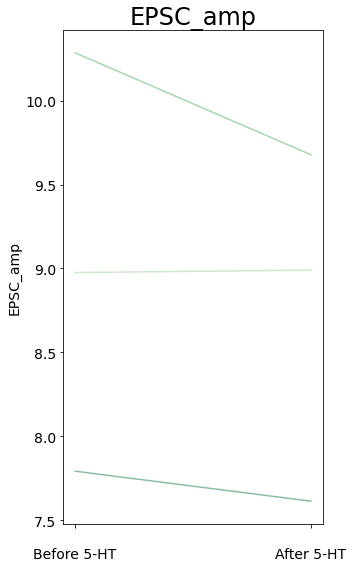

In [17]:
#just a few experiments from macaque, serotonin washins
serotonin_Q = data[(data['treatment'] == "50uM 5-HT") & (data['species'] == "NHP")]

agg_Q = serotonin_Q.groupby(by='after_treatment').mean()

for i in ['AP_peak','halfwidth', 'resonance_freq', 'input_R', 'sag', 'RMP','FI_250','FI_400', 'AP_amp', 'AP_thres', 'EPSC_5sec', 'EPSC_Hz', 'EPSC_amp']:
    plt.figure(figsize=(5, 8))
    sns.lineplot(
        data=serotonin_Q,
        x="after_treatment", y=i, hue="name",
        markers=True, legend=False, palette="Greens", alpha= 0.5)

    plt.xticks( [0,1], labels=["\nBefore 5-HT", "\nAfter 5-HT"], fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('')
    plt.ylabel(i,fontsize=14)
    plt.title('{}'.format(i), fontsize=24)
    plt.tight_layout()

## Metadata

In [18]:
metadata = pd.read_csv("Psilocybin_google_220701.csv")

In [21]:
metadata_short = metadata.loc[:,['File','tube ID','Fill','Layer estimate','Depth from pia', 'Brain Region','Drug Treatment']]

In [22]:
#merge experiment data with metadata

merged = pd.merge(left = serotonin_H, 
                    right = metadata_short, 
                    left_on = 'name', 
                    right_on = 'File', 
                    how = 'inner')

merged.head()


merged_all = pd.merge(left = serotonin, 
                    right = metadata_short, 
                    left_on = 'name', 
                    right_on = 'File', 
                    how = 'inner')

Text(0.5, 1.0, 'Change in RMP in Response to 5HT Correlates with Depth\n')

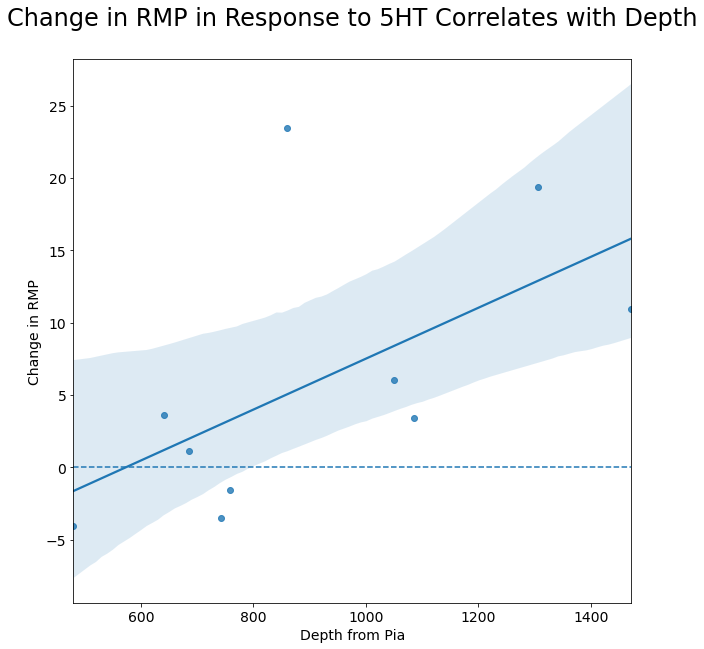

In [23]:
a = (merged[merged["after_treatment"] == 1])
a = a.reset_index()


b = (merged[merged["after_treatment"] == 0])
b = b.reset_index()

a["change_RMP"] = a["RMP"]- b["RMP"]

plt.figure(figsize = (10,10))
sns.regplot(data=a, x="Depth from pia", y="change_RMP")
plt.axhline(0, ls='--')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Depth from Pia', fontsize=14)
plt.ylabel("Change in RMP",fontsize=14)
plt.title('Change in RMP in Response to 5HT Correlates with Depth\n', fontsize=24)

Text(0.5, 1.0, 'Change in EPSC Hz in Response to 5HT Correlates with Depth\n')

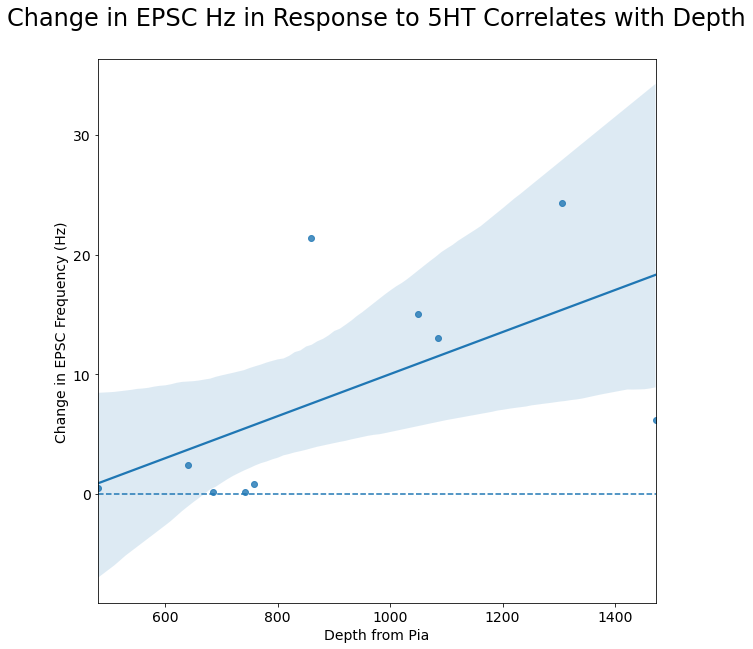

In [24]:
a["change_EPSC"] = a["EPSC_Hz"]- b["EPSC_Hz"]

plt.figure(figsize = (10,10))
sns.regplot(data=a, x="Depth from pia", y="change_EPSC")
plt.axhline(0, ls='--')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Depth from Pia', fontsize=14)
plt.ylabel("Change in EPSC Frequency (Hz)",fontsize=14)
plt.title('Change in EPSC Hz in Response to 5HT Correlates with Depth\n', fontsize=24)

# Psilocybin Analysis

In [25]:
psilocybin_H = data[(data['treatment'] == "50uM psilocybin") & (data['species'] == "human") & (data['common_potential'] != 1)]

In [30]:
psilocybin_M = data[(data['treatment'] == "50uM psilocybin") & (data['species'] == "mouse")]

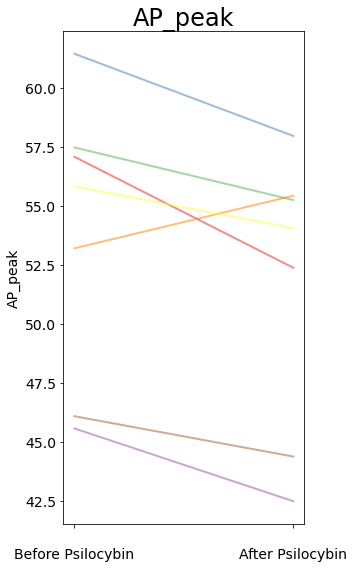

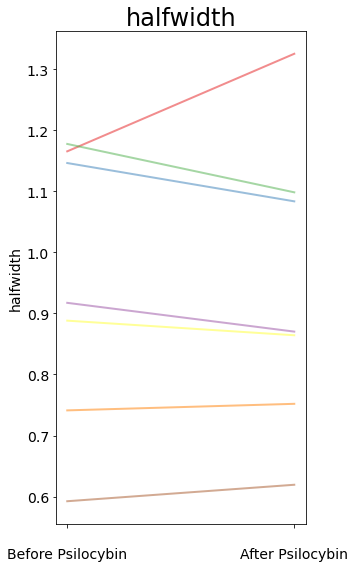

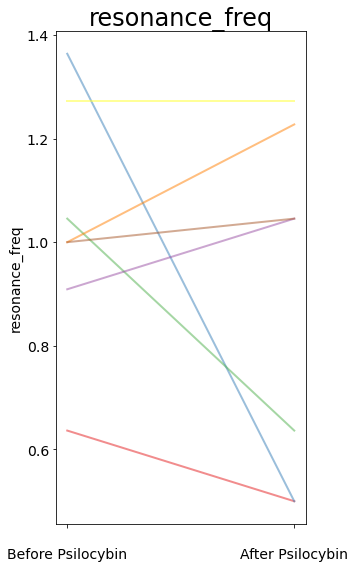

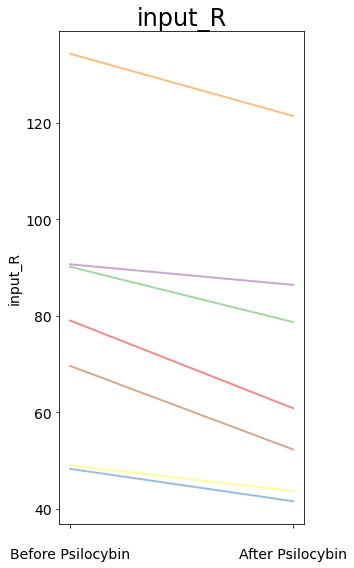

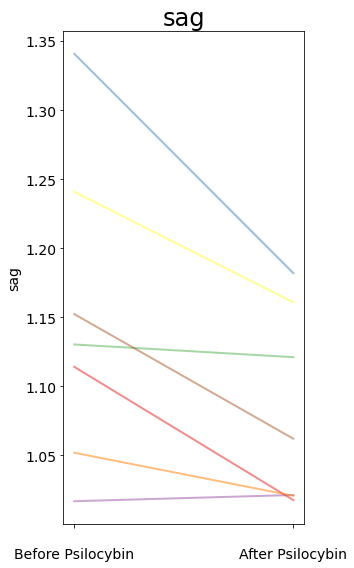

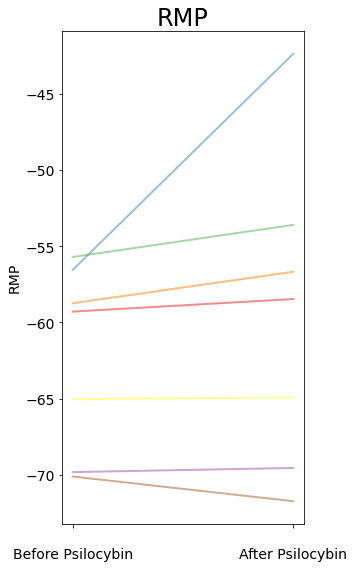

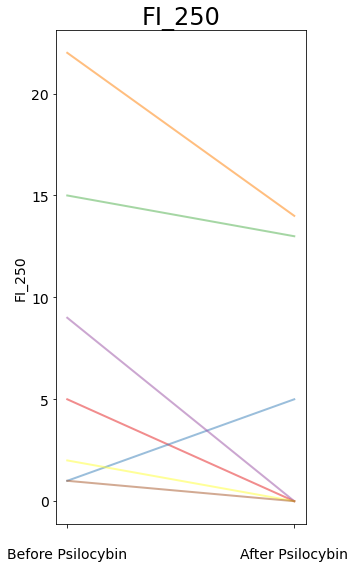

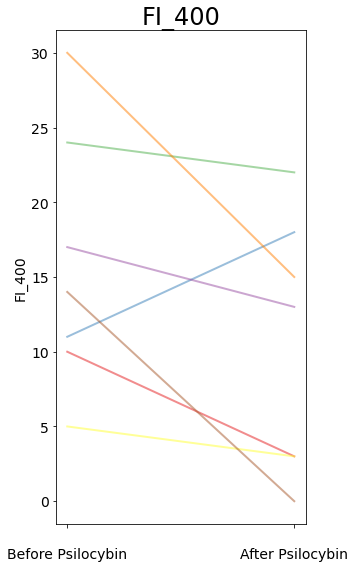

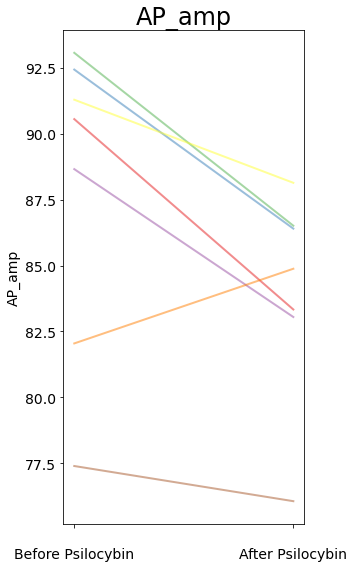

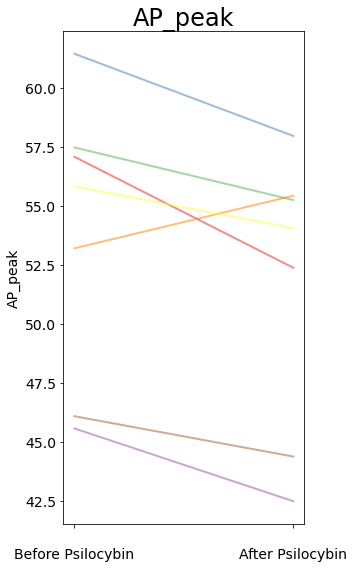

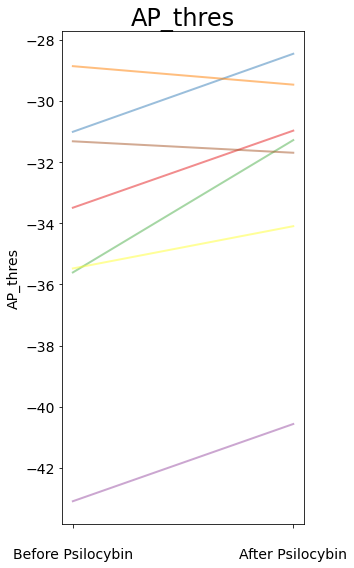

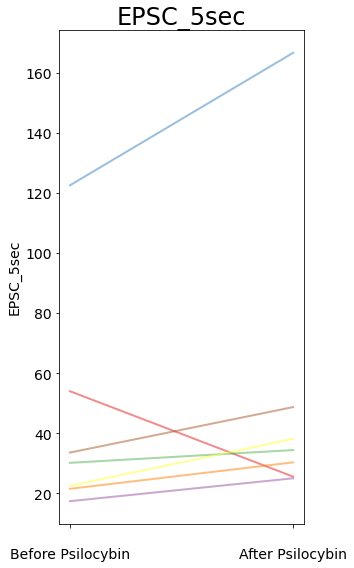

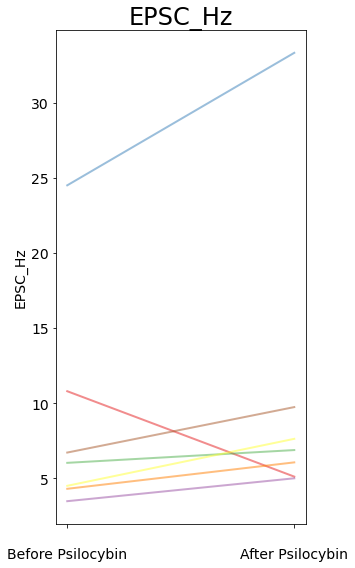

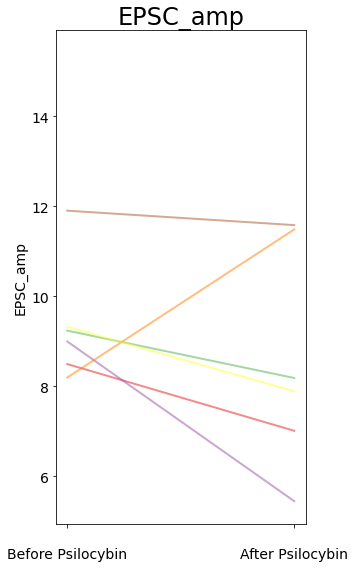

In [26]:
#human psilocybin washin experiments
agg_H = psilocybin_H.groupby(by='after_treatment').mean()

for i in ['AP_peak','halfwidth', 'resonance_freq', 'input_R', 'sag', 'RMP','FI_250','FI_400', 'AP_amp', 'AP_peak','AP_thres', 'EPSC_5sec', 'EPSC_Hz', 'EPSC_amp']:
    plt.figure(figsize=(5, 8))
    sns.lineplot(
        data=psilocybin_H,
        x="after_treatment", y=i, hue="name",
        markers=True, legend=False, palette="Set1", alpha= .5, linewidth=2)

    plt.xticks( [0,1], labels=["\nBefore Psilocybin", "\nAfter Psilocybin"], fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('')
    plt.ylabel(i,fontsize=14)
    plt.title('{}'.format(i), fontsize=24)
    plt.tight_layout()

### add metadata

In [27]:
merged_p = pd.merge(left = psilocybin_H, 
                    right = metadata_short, 
                    left_on = 'name', 
                    right_on = 'File', 
                    how = 'inner')

Text(0.5, 1.0, 'Change in RMP in Response to psilocybin Correlates with Depth?\n')

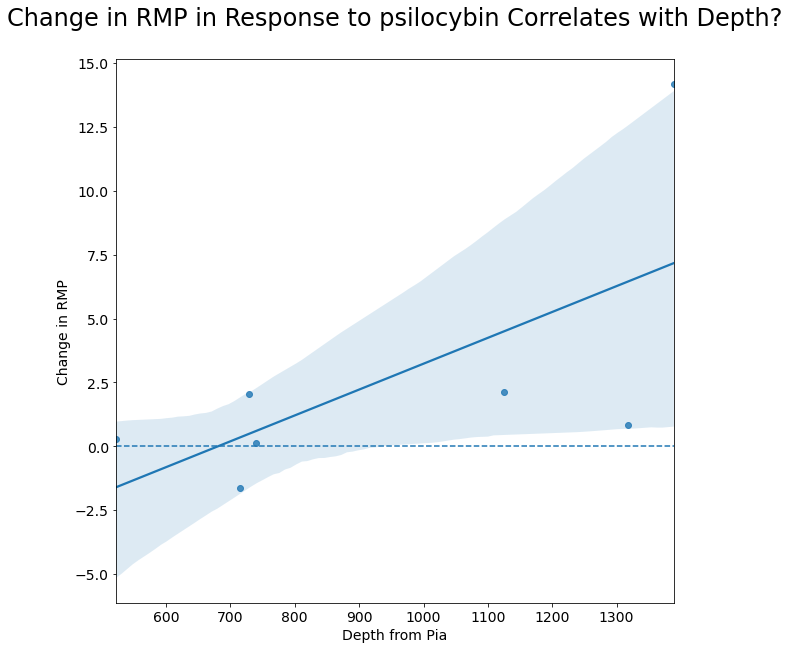

In [28]:
p = (merged_p[merged_p["after_treatment"] == 1])
p = p.reset_index()


j = (merged_p[merged_p["after_treatment"] == 0])
j = j.reset_index()

p["change_RMP"] = p["RMP"]- j["RMP"]
plt.figure(figsize = (10,10))
sns.regplot(data=p, x="Depth from pia", y="change_RMP")
plt.axhline(0, ls='--')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Depth from Pia', fontsize=14)
plt.ylabel("Change in RMP",fontsize=14)
plt.title('Change in RMP in Response to psilocybin Correlates with Depth?\n', fontsize=24)

Text(0.5, 1.0, 'Max Change in RMP During Psilocybin Washin by Depth\n')

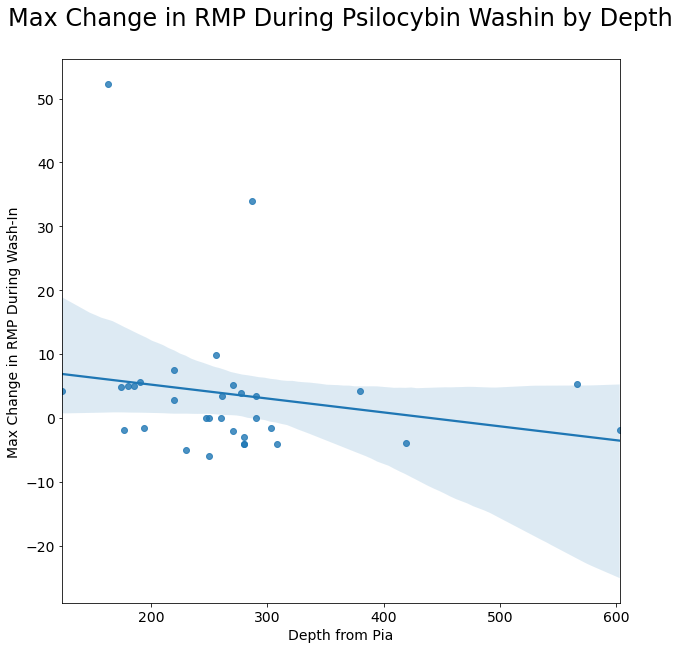

In [31]:
merged_p4 = pd.merge(left = psilocybin_M, 
                    right = metadata_short, 
                    left_on = 'name', 
                    right_on = 'File', 
                    how = 'inner')

p4 = (merged_p4[merged_p4["after_treatment"] == 1])
p4 = p4.reset_index()


plt.figure(figsize = (10,10))
sns.regplot(data=p4, x="Depth from pia", y="washin_change")


plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Depth from Pia', fontsize=14)
plt.ylabel("Max Change in RMP During Wash-In",fontsize=14)
plt.title('Max Change in RMP During Psilocybin Washin by Depth\n', fontsize=24)

Text(0.5, 1.0, 'Max Change in RMP During Psilocybin Washin against EPSC_Hz\n')

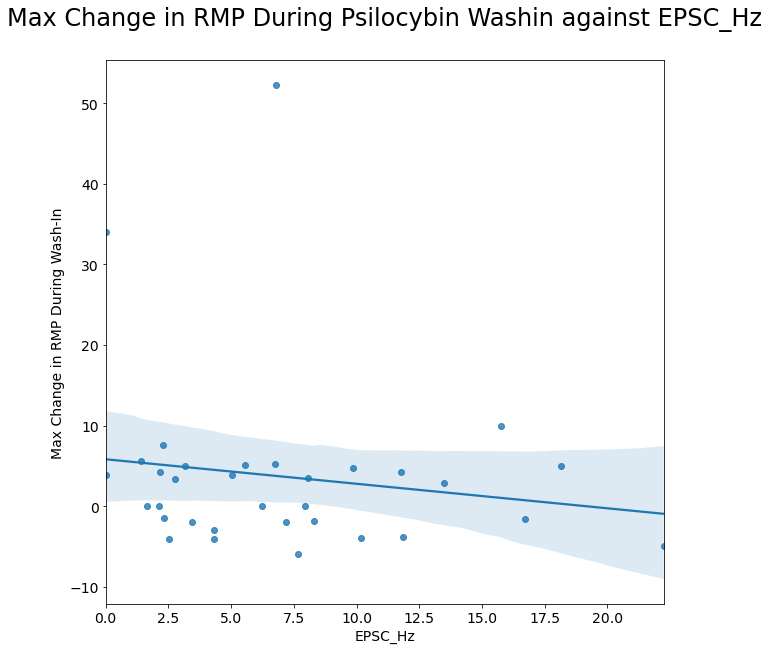

In [32]:
plt.figure(figsize = (10,10))
sns.regplot(data=p4, x="EPSC_Hz", y="washin_change")


plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('EPSC_Hz', fontsize=14)
plt.ylabel("Max Change in RMP During Wash-In",fontsize=14)
plt.title('Max Change in RMP During Psilocybin Washin against EPSC_Hz\n', fontsize=24)

Text(0.5, 1.0, 'Histogram of Change in RMP During Psilocybin Washin\n')

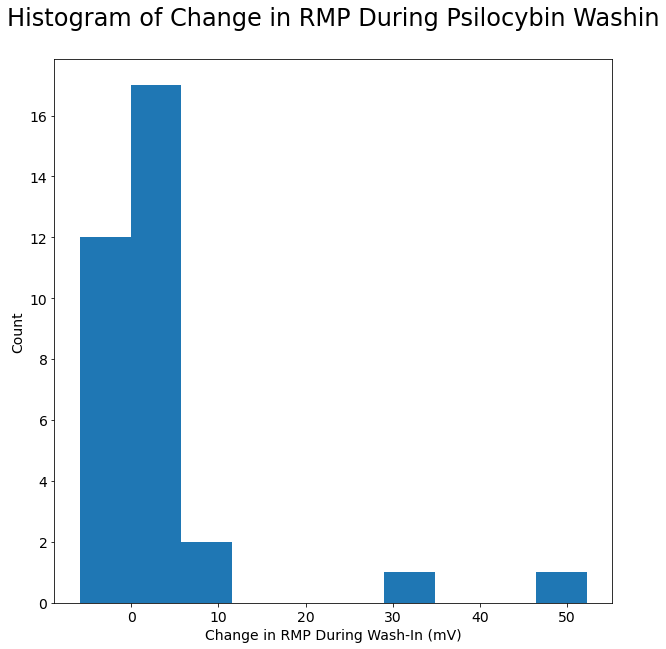

In [33]:
plt.figure(figsize = (10,10))
#sns.histplot(data=p4, x="washin_change")
plt.hist(p4["washin_change"])

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Change in RMP During Wash-In (mV)', fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.title('Histogram of Change in RMP During Psilocybin Washin\n', fontsize=24)

# Psilocin Analysis

Text(0.5, 1.0, 'Max Change in RMP During Human Psilocin Washin\n')

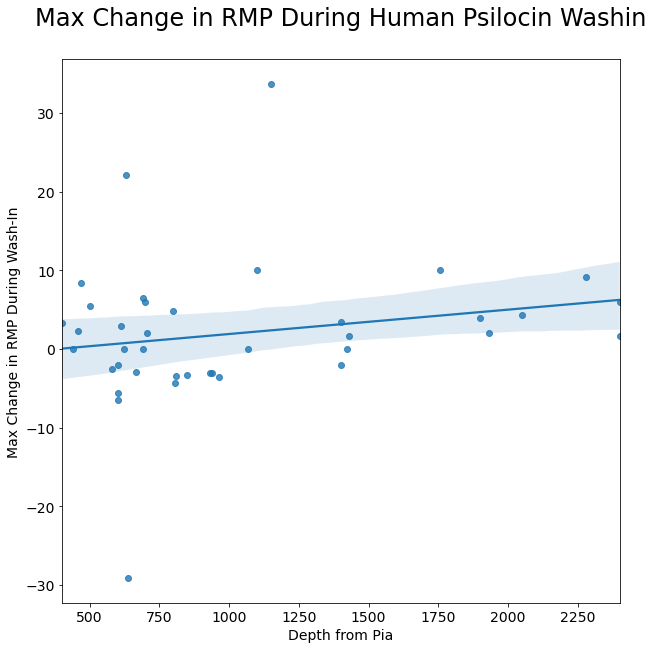

In [35]:
merged_p2 = pd.merge(left = psilocin_H, 
                    right = metadata_short, 
                    left_on = 'name', 
                    right_on = 'File', 
                    how = 'inner')

p2 = (merged_p2[merged_p2["after_treatment"] == 1])
p2 = p2.reset_index()


plt.figure(figsize = (10,10))
sns.regplot(data=p2, x="Depth from pia", y="washin_change")


plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Depth from Pia', fontsize=14)
plt.ylabel("Max Change in RMP During Wash-In",fontsize=14)
plt.title('Max Change in RMP During Human Psilocin Washin\n', fontsize=24)

### mouse psilocin

In [37]:
psilocin_M = data[(data['treatment'].str.contains("psilocin")) & (data['species'] == "mouse") & (data['common_potential'] != 1)]

In [38]:
#check avg change in RMP
psilocin_M[psilocin_M["after_treatment"] == 1]["RMP"].mean() - psilocin_M[psilocin_M["after_treatment"] == 0]["RMP"].mean()

1.4872956435137894

Text(0.5, 1.0, 'Max Change in RMP During Psilocin Washin by Depth\n')

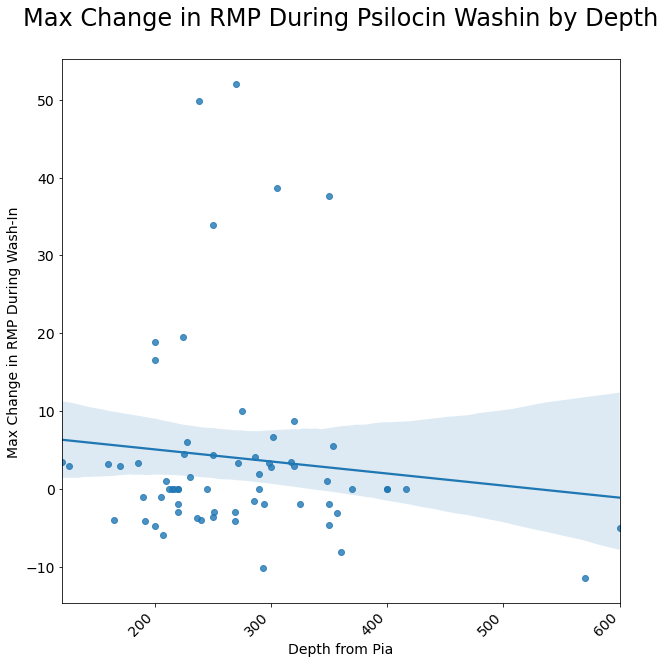

In [39]:
merged_p3 = pd.merge(left = psilocin_M, 
                    right = metadata_short, 
                    left_on = 'name', 
                    right_on = 'File', 
                    how = 'inner')

p3 = (merged_p3[merged_p3["after_treatment"] == 1])
p3 = p3.reset_index()


plt.figure(figsize = (10,10))
sns.regplot(data=p3[p3['Brain Region'] != 'CLA'], x="Depth from pia", y="washin_change")


plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Depth from Pia', fontsize=14)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.ylabel("Max Change in RMP During Wash-In",fontsize=14)
plt.title('Max Change in RMP During Psilocin Washin by Depth\n', fontsize=24)

# Antagonist - Ketanserin

Mouse washin experiments with psilocin + ketanserin (5ht2a antagonist)

In [40]:
psilocin_ketanserin_wash = pd.read_csv('psilocin_ketanserin_washin.csv')
psilocin_ketanserin_wash.set_index('seconds', inplace =True)

In [41]:
norm2 = psilocin_ketanserin_wash -  psilocin_ketanserin_wash.iloc[0,:]

(0.0, 600.0)

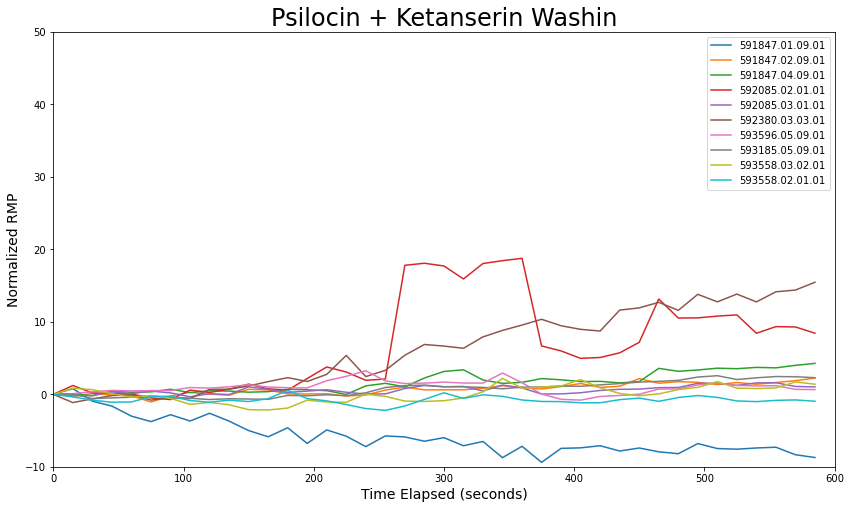

In [42]:
plt.figure(figsize = (14,8))
sns.lineplot(data=norm2, dashes=False)
plt.xlabel('Time Elapsed (seconds)', fontsize=14)
plt.ylabel("Normalized RMP",fontsize=14)
plt.title('Psilocin + Ketanserin Washin', fontsize=24)
plt.ylim(-10,50)
plt.xlim(0,600)